# Classification: Naive Bayes

In [1]:
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [2]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [3]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


## Naive Bayes method

In [4]:
'''
NAIVE BAYES classifier:

(1) Training is fast because only the probability of each class and the probability of each class given different input (x) values need to be calculated. 
(2) No coefficients need to be fitted by optimization procedures!

Bernoulli Naive Bayes: it assumes that all our features are binary.
Multinomial Naive Bayes: it is used when we discrete data
Gaussian Naive Bayes: Naive Bayes can be extended to real-valued attributes, 
    most commonly by assuming a Gaussian distribution.
    we can give prior probabilities of the classes with the parameter 
    priors : array-like, y_pred=shape (n_classes,)
'''

from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [5]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.6666666666666666


In [6]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.72      0.62      0.67        81

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



In [7]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[131  19]
 [ 31  50]]


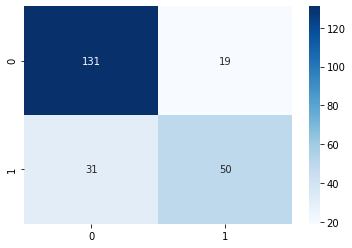

In [8]:
%matplotlib inline
import seaborn as sns


# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


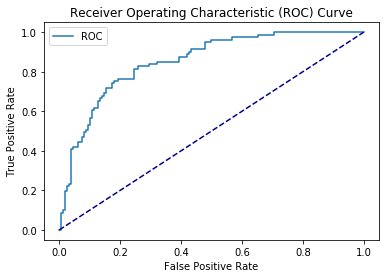

AUC: 0.85


In [9]:
from sklearn import metrics

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)